# 1.Import the necessary libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from os import system
import scipy.stats as stats

# 2.Read the data as a data frame

In [2]:
bankData_raw = pd.read_csv("bank-full.csv")
bankData_raw.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


# 3. Basic EDA which should include the following and print out  insights at every step.

# 3.a Shape of the data

In [280]:
bankData_raw.shape  ##45211 rows and 17 columns 

(45211, 17)

# 3.b. Data type of each attribute

In [119]:
bankData_raw.info() #many columns are of type object i.e. strings. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# 3.c. Checking the presence of missing values 

In [3]:
bankData_raw.isnull().values.any() 

False

In [5]:

#checking missing values - null values 
def missing_check(bankdata_raw):
    total = bankdata_raw.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (bankData_raw.isnull().sum()/bankdata_raw.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(bankData_raw)

,Total,Percent
Target,0,0.0
loan,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
contact,0,0.0
poutcome,0,0.0


In [7]:
bankData_raw.count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

# 3.d. 5 Point summary of numerical attributes

In [281]:
# Five point summary  : min, 25%, median, 75%, max
bankData_raw.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [17]:
(bankData_raw)[0:-1]# 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


# 3.e. Checking the presence of outliers 


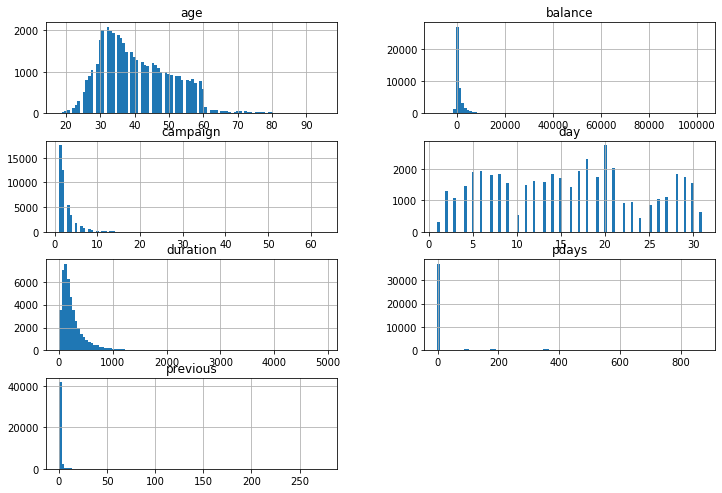

In [283]:
#Data distubution of cloumn
columns = list(bankData_raw)[0:-1] # 
bankData_raw[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 



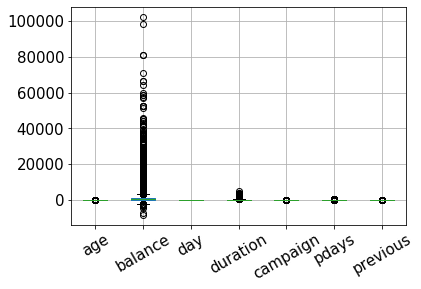

In [288]:
bankData_raw.boxplot(grid=True, rot=30, fontsize=15)  ##Box plot

In [291]:
##Data distubution of traget cloumn
bankData_raw.groupby(["Target"]).mean()

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [292]:
bankData_raw.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


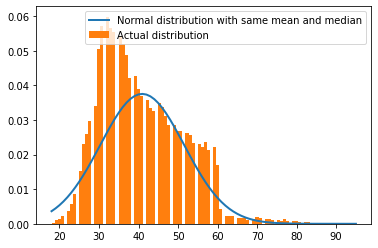

In [295]:
h = np.asarray(bankData_raw['age'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


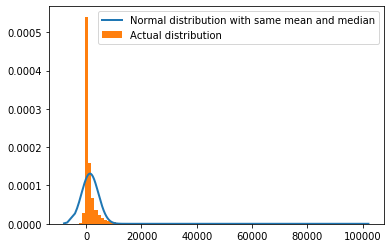

In [278]:
h = np.asarray(bankData_raw['balance'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


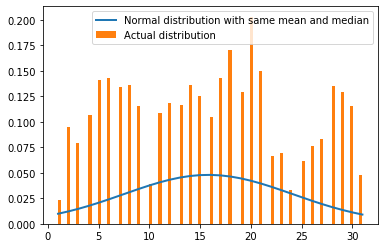

In [277]:
h = np.asarray(bankData_raw['day'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


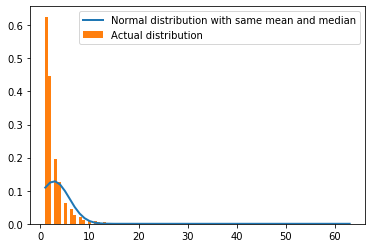

In [276]:
h = np.asarray(bankData['campaign'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


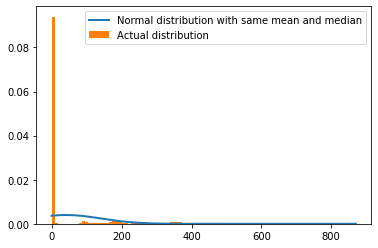

In [298]:
h = np.asarray(bankData_raw['pdays'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

C:\Users\91888\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


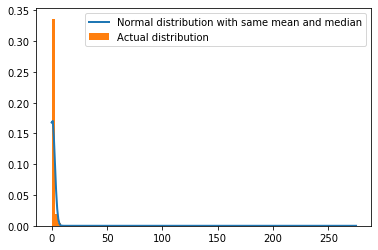

In [274]:
h = np.asarray(bankData_raw['previous'])
h = sorted(h)
 
#use the scipy stats module 
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and median")
plt.hist(h,normed=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [20]:
bankData_raw.cov() 
bankData_raw.corr() 

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


C:\Users\91888\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\91888\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\91888\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\91888\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\91888\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

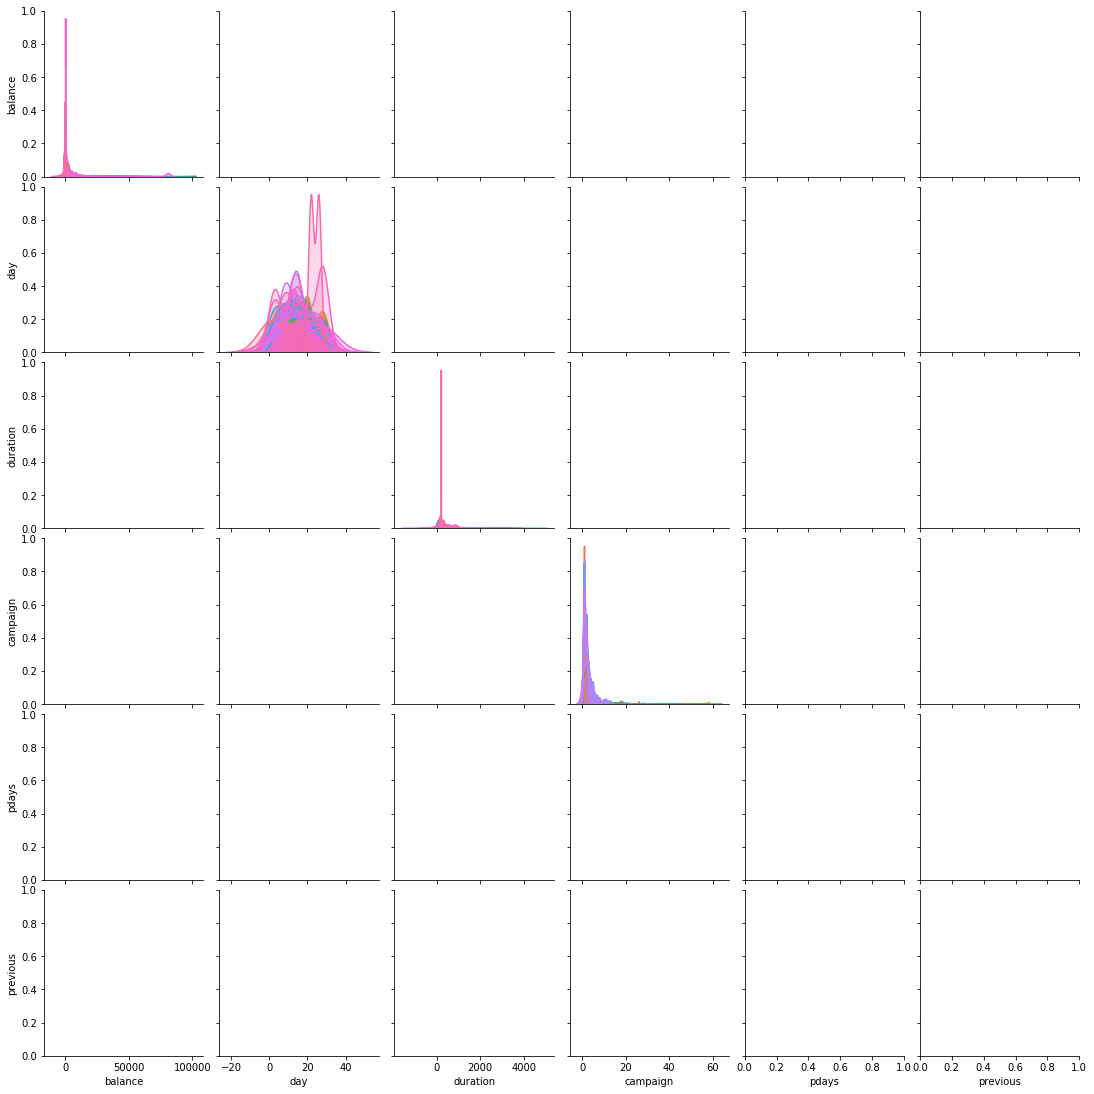

In [21]:
import seaborn as sns
sns.pairplot(bankData_raw, hue="age", palette="husl")

There are outliers in the data, majority in balance, campaign, plays, previous columns.

# 4.Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc

In [23]:
bankData = bankData_raw.drop(['duration'], axis=1)  ## AS mentioned in columns description and for better model, removing 'duration' column

In [24]:
bankData.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no


In [320]:
## Printing all coloumns info.
print(bankData.age.value_counts() )
print (" ")
print(bankData.job.value_counts())
print (" ")
print(bankData.marital.value_counts())
print (" ")
print(bankData.education.value_counts())
print (" ")
print(bankData.default.value_counts())
print (" ")
print(bankData.balance.value_counts())
print (" ")
print(bankData.contact.value_counts())
print (" ")
print(bankData.loan.value_counts())
print (" ")
print(bankData.contact.value_counts())
print (" ")
print(bankData.day.value_counts())
print (" ")
print(bankData.month.value_counts())
print (" ")
print(bankData.campaign.value_counts())
print (" ")
print(bankData.pdays.value_counts())
print (" ")
print(bankData.previous.value_counts())
print (" ")
print(bankData.poutcome.value_counts())
print (" ")
print(bankData.Target.value_counts())



32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
 
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
 
no     44396
yes      815
Name: default, dtype: int64
 
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
 
no     37967
yes  

In [321]:
##Based on above EDA, it was giving only for numerical Data type but missing object datatype, so we have to handle these data types as well because it is very much important in terms of  handling these columns for better models accuracy. .


In [27]:
#converting the columns with an 'object' datatype into categorical variables

for feature in bankData.columns: # Loop through all columns in the dataframe
    if bankData[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankData[feature] = pd.Categorical(bankData[feature])# Replace strings with an integer
bankData.head(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,1,-1,0,unknown,no


In [323]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  category
 15  Target     45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.5 MB


In [324]:
## printing number of count of columns

print(bankData.job.value_counts())
print (" ")
print(bankData.marital.value_counts())
print (" ")
print(bankData.education.value_counts())
print (" ")
print(bankData.default.value_counts())
print (" ")
print(bankData.contact.value_counts())
print (" ")
print(bankData.loan.value_counts())
print (" ")
print(bankData.contact.value_counts())
print (" ")
print(bankData.month.value_counts())
print (" ")
print(bankData.poutcome.value_counts())
print (" ")
print(bankData.Target.value_counts())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
 
no     44396
yes      815
Name: default, dtype: int64
 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
 
no     37967
yes     7244
Name: loan, dtype: int64
 
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
 
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
 
unknown    36959
failure     4901
other       1840


In [32]:
##based on above we will be replacing target with values and creating dummy values for categorical columns
replaceStruct = {
                "Target":     {"no": 0, "yes": 1 } 
                }
oneHotCols=["job","marital","education","default","housing","loan","contact","month","poutcome"]

In [33]:
bankData=bankData.replace(replaceStruct)
bankData=pd.get_dummies(bankData, columns=oneHotCols)
bankData.head(10)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [327]:
## checking number of records and percentage of number people subcribe or not in total data

n_yes = len(bankData.loc[bankData['Target'] == 1])
n_no = len(bankData.loc[bankData['Target'] == 0])
print("Number people subscribe : {0} ({1:2.2f}%)".format(n_yes, (n_yes / (n_yes + n_no)) * 100 ))
print("Number people not subscribe : {0} ({1:2.2f}%)".format(n_no, (n_no / (n_yes + n_no)) * 100))

Number people subscribe : 5289 (11.70%)
Number people not subscribe : 39922 (88.30%)


# 5.Train a few standard classification algorithms, note and comment on their performances across different classification metrics.

# Logistic regression


In [328]:

X_LOG = bankData.drop('Target',axis=1)     # Predictor feature columns (8 X m)
Y_LOG = bankData['Target']   # Predicted class (1=Yes, 0=No) (1 X m)

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X_LOG, Y_LOG, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train_log.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6149,32,-238,27,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
12403,34,-478,27,4,-1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21645,32,266,19,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29580,36,13,3,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
31245,23,486,3,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [329]:
## chcking split of data 
print("{0:0.2f}% data is in training set".format((len(x_train_log)/len(bankData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_log)/len(bankData.index)) * 100))



70.00% data is in training set
30.00% data is in test set


In [330]:
## now lets check loans 0/1 in split data
print("Original Loan 1 Values    : {0} ({1:0.2f}%)".format(len(bankData.loc[bankData['Target'] == 1]), (len(bankData.loc[bankData['Target'] == 1])/len(bankData.index)) * 100))
print("Original Loan 0 Values   : {0} ({1:0.2f}%)".format(len(bankData.loc[bankData['Target'] == 0]), (len(bankData.loc[bankData['Target'] == 0])/len(bankData.index)) * 100))
print("")
print("Training Loan 1 Values    : {0} ({1:0.2f}%)".format(len(y_train_log[y_train_log[:] == 1]), (len(y_train_log[y_train_log[:] == 1])/len(y_train_log)) * 100))
print("Training Loan 0 Values   : {0} ({1:0.2f}%)".format(len(y_train_log[y_train_log[:] == 0]), (len(y_train_log[y_train_log[:] == 0])/len(y_train_log)) * 100))
print("")
print("Test Loan 1 Values        : {0} ({1:0.2f}%)".format(len(y_test_log[y_test_log[:] == 1]), (len(y_test_log[y_test_log[:] == 1])/len(y_test_log)) * 100))
print("Test Loan 0 Values       : {0} ({1:0.2f}%)".format(len(y_test_log[y_test_log[:] == 0]), (len(y_test_log[y_test_log[:] == 0])/len(y_test_log)) * 100))

Original Loan 1 Values    : 5289 (11.70%)
Original Loan 0 Values   : 39922 (88.30%)

Training Loan 1 Values    : 3738 (11.81%)
Training Loan 0 Values   : 27909 (88.19%)

Test Loan 1 Values        : 1551 (11.43%)
Test Loan 0 Values       : 12013 (88.57%)


In [331]:

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train_log, y_train_log)
#predict on test
y_predict_log = model.predict(x_test_log)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1         2         3         4         5         6  \
0 -0.001872  0.00002  0.000928 -0.085352 -0.000191  0.018063 -0.004119   

          7         8         9  ...        41        42        43        44  \
0 -0.146609 -0.336863 -0.267142  ...  1.036002 -0.386737 -0.744273  0.868949   

         45        46       47       48        49  intercept  
0  0.777299 -0.733276 -0.51823  1.48472 -0.640829  -0.407615  

[1 rows x 51 columns]


In [332]:
model_score_train_log = model.score(x_train_log, y_train_log)
print(model_score_train_log)

0.8908901317660441


In [333]:
model_score_test_log = model.score(x_test_log, y_test_log)
print(model_score_test_log)

0.8937629017988794


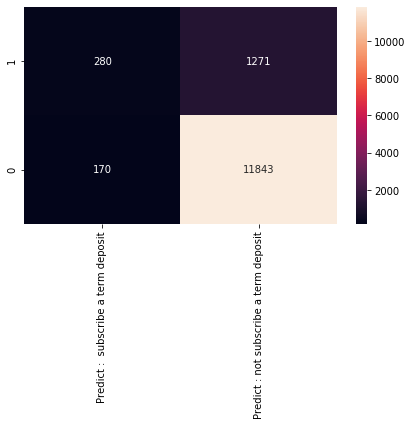

In [334]:
cm_logistic=metrics.confusion_matrix(y_test_log, y_predict_log, labels=[1, 0])

df_cm_logistic = pd.DataFrame(cm_logistic, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict :  subscribe a term deposit","Predict : not subscribe a term deposit"]])
plt.figure(figsize = (7,4))
sns.heatmap(df_cm_logistic, annot=True,fmt='g')

In [335]:
df_cm_logistic

,Predict : subscribe a term deposit,Predict : not subscribe a term deposit
1,280,1271
0,170,11843


In [336]:
print("Classification Report for logistic regression ")
print(metrics.classification_report(y_test_log, y_predict_log, labels=[1, 0]))

Classification Report for logistic regression 
              precision    recall  f1-score   support

           1       0.62      0.18      0.28      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



# Using NaiveBayes

In [25]:
X_NB = bankData.drop('Target',axis=1)

Y_NB = bankData['Target']   

x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(X_NB, Y_NB, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train_nb.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
6149,32,blue-collar,married,secondary,yes,-238,yes,no,unknown,27,may,1,-1,0,unknown
12403,34,admin.,single,secondary,no,-478,yes,yes,unknown,27,jun,4,-1,0,unknown
21645,32,technician,married,secondary,no,266,yes,no,cellular,19,aug,2,-1,0,unknown
29580,36,blue-collar,married,secondary,yes,13,no,yes,cellular,3,feb,4,-1,0,unknown
31245,23,student,single,secondary,no,486,no,no,cellular,3,mar,1,-1,0,unknown


In [338]:
print("{0:0.2f}% data is in training set".format((len(x_train_nb)/len(bankData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_nb)/len(bankData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [30]:

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
Gau_model = GaussianNB()

Gau_model.fit(x_train_nb, y_train_nb.ravel())

ValueError: could not convert string to float: 'blue-collar'

In [340]:
#performance of our model with training data
Gau_train_predict = Gau_model.predict(x_train_nb)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train_nb, Gau_train_predict)))
print()

Model Accuracy: 0.8349



In [341]:
#performance of our model with training data
Gau_test_predict = Gau_model.predict(x_test_nb)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test_nb, Gau_test_predict)))
print()

Model Accuracy: 0.8348



Lets check the confusion matrix and classification report

Confusion Matrix Naive Bayes


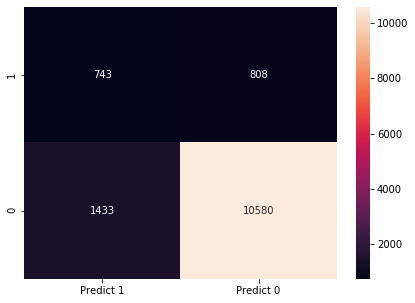

In [342]:
print("Confusion Matrix Naive Bayes")
cm_nb=metrics.confusion_matrix(y_test_nb, Gau_test_predict, labels=[1, 0])

df_cm_nb = pd.DataFrame(cm_nb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_nb, annot=True,fmt='g')

In [343]:
df_cm_nb

,Predict 1,Predict 0
1,743,808
0,1433,10580


In [344]:
print("Classification Report for naiveBayes ")
print(metrics.classification_report(y_test_nb, Gau_test_predict, labels=[1, 0]))

Classification Report for naiveBayes 
              precision    recall  f1-score   support

           1       0.34      0.48      0.40      1551
           0       0.93      0.88      0.90     12013

    accuracy                           0.83     13564
   macro avg       0.64      0.68      0.65     13564
weighted avg       0.86      0.83      0.85     13564



# KNN

In [345]:
X_KNN_non_scaled = bankData.drop('Target',axis=1)   

Y_KNN = bankData['Target']

In [346]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
from scipy.stats import zscore
X_KNN  = X_KNN_non_scaled.apply(zscore)  # convert all attributes to Z scale 

X_KNN.describe()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,...,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15,-9.219436e-15,1.254699e-14,-1.395817e-13,1.355210e-13,4.981280e-15,1.927086e-14,-1.268778e-14,1.467619e-14,...,1.672611e-14,1.406700e-14,7.421982e-14,-9.714164e-14,-5.102876e-14,5.457301e-14,7.057521e-14,-5.518320e-14,-1.030514e-13,5.035903e-14
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.779108e+00,-5.693506e-01,-4.114531e-01,-2.519404e-01,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,...,-3.660060e-01,-1.032620e-01,-6.616496e-01,-3.102635e-01,-1.288190e-01,-1.138980e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,-2.116316e+00
25%,-7.473845e-01,-4.237719e-01,-9.380027e-01,-5.693506e-01,-4.114531e-01,-2.519404e-01,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,...,-3.660060e-01,-1.032620e-01,-6.616496e-01,-3.102635e-01,-1.288190e-01,-1.138980e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,4.725192e-01
50%,-1.823406e-01,-3.002800e-01,2.326031e-02,-2.465603e-01,-4.114531e-01,-2.519404e-01,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,...,-3.660060e-01,-1.032620e-01,-6.616496e-01,-3.102635e-01,-1.288190e-01,-1.138980e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,4.725192e-01
75%,6.652252e-01,2.158743e-02,6.240497e-01,7.622994e-02,-4.114531e-01,-2.519404e-01,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,...,-3.660060e-01,-1.032620e-01,1.511374e+00,-3.102635e-01,-1.288190e-01,-1.138980e-01,-3.486872e-01,-2.059725e-01,-1.859480e-01,4.725192e-01
max,5.091402e+00,3.309478e+01,1.825628e+00,1.944365e+01,8.297431e+00,1.191360e+02,2.782658e+00,1.909346e+00,5.422561e+00,5.954871e+00,...,2.732196e+00,9.684109e+00,1.511374e+00,3.223067e+00,7.762829e+00,8.779785e+00,2.867900e+00,4.855018e+00,5.377848e+00,4.725192e-01


In [347]:

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_KNN, Y_KNN, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train_knn.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6149,-0.841558,-0.525587,1.344997,-0.569351,-0.411453,-0.25194,-0.359369,1.909346,-0.184415,-0.16793,...,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
12403,-0.653211,-0.604412,1.344997,0.399020,-0.411453,-0.25194,2.782658,-0.523740,-0.184415,-0.16793,...,2.732196,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
21645,-0.841558,-0.360055,0.383734,-0.246560,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
29580,-0.464863,-0.443150,-1.538792,0.399020,-0.411453,-0.25194,-0.359369,1.909346,-0.184415,-0.16793,...,-0.366006,-0.103262,-0.661650,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519
31245,-1.689124,-0.287799,-1.538792,-0.569351,-0.411453,-0.25194,-0.359369,-0.523740,-0.184415,-0.16793,...,-0.366006,9.684109,-0.661650,-0.310263,-0.128819,-0.113898,-0.348687,-0.205972,-0.185948,0.472519


In [348]:
print("{0:0.2f}% data is in training set".format((len(x_train_knn)/len(bankData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test_knn)/len(bankData.index)) * 100))
print ("{0:0.2f} : Number of records in test data set  " .format(len(x_test_knn)))

70.00% data is in training set
30.00% data is in test set
13564.00 : Number of records in test data set  


In [350]:


#so here K is 116 and it is going permonace by looking at graph 
#and test records =13564.00 (30%)
#sqrt(13564‬)

In [351]:
#from sklearn.neighbors import KNeighborsClassifier
#scores =[]
#for k in range(50,200):
#    NNH_FOR_K = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
#    NNH_FOR_K.fit(x_train_knn, y_train_knn)
#    scores.append(NNH_FOR_K.score(x_test_knn, y_test_knn))
#plt.plot(range(50,200),scores)

In [352]:

NNH = KNeighborsClassifier(n_neighbors= 116 , weights = 'distance' )
NNH.fit(x_train_knn, y_train_knn)
NNH

KNeighborsClassifier(n_neighbors=116, weights='distance')

Evaluate Performance of kNN Model

In [353]:
# For every test data point, predict it's label based on 116 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

knn_predicted_labels = NNH.predict(x_test_knn)
NNH.score(x_test_knn, y_test_knn)

0.8952373930993807

Confusion Matrix for knn


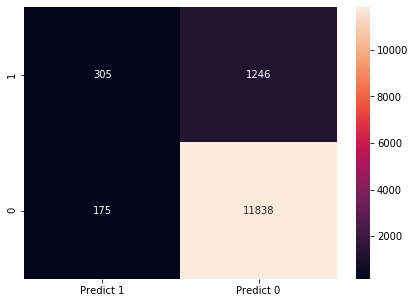

In [354]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix for knn")
cm_knn=metrics.confusion_matrix(y_test_knn, knn_predicted_labels, labels=[1,0])

df_cm_knn = pd.DataFrame(cm_knn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_knn, annot=True,fmt='g')

In [357]:
df_cm_knn

,Predict 1,Predict 0
1,305,1246
0,175,11838


In [358]:
print("Classification Report for knn")
print(metrics.classification_report(y_test_knn, knn_predicted_labels, labels=[1, 0]))

Classification Report for knn
              precision    recall  f1-score   support

           1       0.64      0.20      0.30      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564



# 6.Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees

# Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.

In [359]:
X_DT = bankData.drop('Target',axis=1)

Y_DT = bankData['Target']   

X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_DT, Y_DT, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train_dt.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6149,32,-238,27,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
12403,34,-478,27,4,-1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21645,32,266,19,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29580,36,13,3,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
31245,23,486,3,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [360]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(random_state=1)

Scoring our Decision Tree

In [361]:
print(dTree.score(X_train_dt, y_train_dt))
print(dTree.score(X_test_dt, Y_test_dt))

1.0
0.8299174284871719


Reducing over fitting (Regularization)

In [362]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train_dt, y_train_dt)
print(dTreeR.score(X_train_dt, y_train_dt))
print(dTreeR.score(X_test_dt, Y_test_dt))

0.8925332574967612
0.8956060159245061


In [363]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train_dt.columns))

                          Imp
age                  0.125252
balance              0.000000
day                  0.004643
campaign             0.000000
pdays                0.004044
previous             0.000000
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_divorced     0.000000
marital_married      0.000000
marital_single       0.000000
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.000000
education_unknown    0.000000
default_no           0.000000
default_yes          0.000000
housing_no           0.019140
housing_yes          0.000000
loan_no              0.000000
loan_yes             0.000000
contact_cellular     0.000000
contact_te

0.8956060159245061


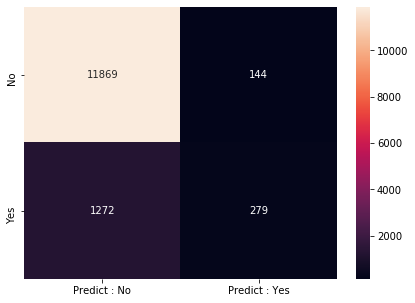

In [364]:
print(dTreeR.score(X_test_dt , Y_test_dt))
y_predict_dt = dTreeR.predict(X_test_dt)

cm_dt=metrics.confusion_matrix(y_test_dt, y_predict_dt, labels=[0, 1])

df_cm_dt = pd.DataFrame(cm_dt, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict : No","Predict : Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_dt, annot=True ,fmt='g')

In [365]:
df_cm_dt

,Predict : No,Predict : Yes
No,11869,144
Yes,1272,279


In [366]:
print("Classification Report for DT")
print(metrics.classification_report(Y_test_dt, y_predict_dt, labels=[1, 0]))

Classification Report for DT
              precision    recall  f1-score   support

           1       0.66      0.18      0.28      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.88      0.90      0.87     13564



# Ensemble Learning - Bagging

In [367]:
X_ET = bankData.drop('Target',axis=1)

Y_ET = bankData['Target']   

X_train_et, X_test_et, Y_train_et, Y_test_et = train_test_split(X_ET,Y_ET, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train_et.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
6149,32,-238,27,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
12403,34,-478,27,4,-1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
21645,32,266,19,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
29580,36,13,3,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
31245,23,486,3,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [368]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_et, Y_train_et)


In [369]:
bgcl

BaggingClassifier(n_estimators=50, random_state=1)

0.8927307578885284


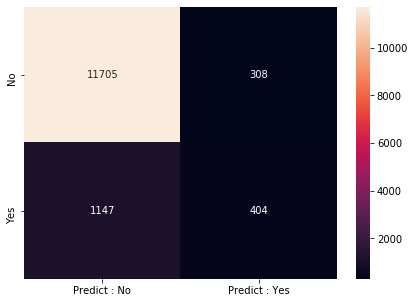

In [370]:
y_predict_bg = bgcl.predict(X_test_et)

print(bgcl.score(X_test_et , Y_test_et))

cm_bg=metrics.confusion_matrix(Y_test_et, y_predict_bg,labels=[0, 1])

df_cm_bg = pd.DataFrame(cm_bg, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict : No","Predict : Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_bg, annot=True ,fmt='g')


In [371]:
df_cm_bg

,Predict : No,Predict : Yes
No,11705,308
Yes,1147,404


# Ensemble Learning - AdaBoosting

In [372]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train_et, Y_train_et)

In [373]:
y_predict_abcl = abcl.predict(X_test_et)
print(abcl.score(X_test_et , Y_test_et))

cm_abcl=metrics.confusion_matrix(Y_test_et, y_predict_abcl,labels=[0, 1])



0.8942789737540549


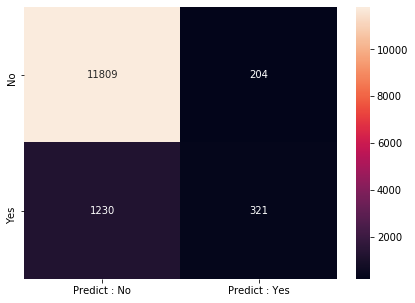

In [374]:
df_cm_abcl = pd.DataFrame(cm_abcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict : No","Predict : Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_abcl, annot=True ,fmt='g')

# Ensemble Learning - GradientBoost

In [375]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_et, Y_train_et)


In [376]:
y_predict_gbcl = gbcl.predict(X_test_et)
print(gbcl.score(X_test_et, Y_test_et))
cm_gbcl=metrics.confusion_matrix(Y_test_et, y_predict_gbcl,labels=[0, 1])


0.8948687702742554


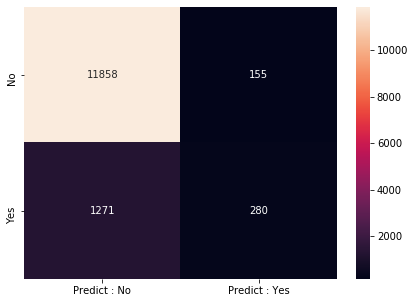

In [377]:

df_cm_gbcl = pd.DataFrame(cm_gbcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict : No","Predict : Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gbcl, annot=True ,fmt='g')

# Ensemble RandomForest Classifier

In [378]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier( criterion = 'entropy',n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train_et, Y_train_et)


In [379]:
y_predict_rfcl = rfcl.predict(X_test_et)
print(rfcl.score(X_test_et, Y_test_et))
cm_rfcl=metrics.confusion_matrix(Y_test_et, y_predict_rfcl,labels=[0, 1])



0.8942052491890298


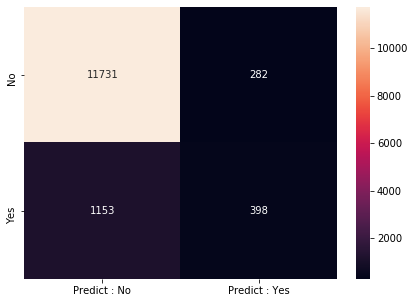

In [380]:
df_cm_rfcl = pd.DataFrame(cm_rfcl, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict : No","Predict : Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rfcl, annot=True ,fmt='g')

# Accuracy between models

In [381]:
print(dTreeR.score(X_test_dt, Y_test_dt))   #Decision Tree

0.8956060159245061


In [382]:
print(abcl.score(X_test_et , Y_test_et))   ##AdaBoosting 

0.8942789737540549


In [383]:
print(gbcl.score(X_test_et , Y_test_et))  ## GradientBoost

0.8948687702742554


In [384]:
print(rfcl.score(X_test_et , Y_test_et)) ##RandomForest Classifier

0.8942052491890298


Mostly accuracy between single regularized decision tree and ensemble techniques with limited estimators is mostly close to each other  

# 7.Compare performances of all the models 


In [387]:
print("Classification Report for logistic regression ")
print(metrics.classification_report(y_test_log, y_predict_log, labels=[1, 0]))

print("Classification Report for naiveBayes ")
print(metrics.classification_report(y_test_nb, Gau_test_predict, labels=[1, 0]))

print("Classification Report for knn")
print(metrics.classification_report(y_test_knn, knn_predicted_labels, labels=[1, 0]))

print("Classification Report for Decision Tress")
print(metrics.classification_report(Y_test_dt, y_predict_dt, labels=[1, 0]))

print("Classification Report for Bagging")
print(metrics.classification_report(Y_test_et, y_predict_bg, labels=[1, 0]))

print("Classification Report for AdaBoosting")
print(metrics.classification_report(Y_test_et, y_predict_abcl, labels=[1, 0]))

print("Classification Report for Gradient Boosting")
print(metrics.classification_report(Y_test_et, y_predict_gbcl, labels=[1, 0]))

print("Classification Report for Random Forest")
print(metrics.classification_report(Y_test_et, y_predict_rfcl, labels=[1, 0]))

Classification Report for logistic regression 
              precision    recall  f1-score   support

           1       0.62      0.18      0.28      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.76      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564

Classification Report for naiveBayes 
              precision    recall  f1-score   support

           1       0.34      0.48      0.40      1551
           0       0.93      0.88      0.90     12013

    accuracy                           0.83     13564
   macro avg       0.64      0.68      0.65     13564
weighted avg       0.86      0.83      0.85     13564

Classification Report for knn
              precision    recall  f1-score   support

           1       0.64      0.20      0.30      1551
           0       0.90      0.99      0.94     12013

    accuracy                           0.90     13564
   macro avg 

Each model is good at it's own accuracy, precision and Recall calculations. 
Out of all mostly with slight variations  KNN and Gradient Boosting would be better choice.